# Power analysis in python

Below is the code you'll need to perform a power analysis in python.

At the bottom of this notebook is a practice exercise using data from the pilot study of Matt's example grant application (see Learn).

In [ ]:
# import necessary modules

import numpy as np
import statsmodels.stats.power as smp

power_analysis = smp.TTestIndPower()

### Calculate required sample size for desired power and for known difference in means and standard deviation

In [2]:
# Calculate required sample size for desired power and for known difference in means and standard deviation

power = 0.8  # desired power (e.g., 80%)
difference_in_means = 5
std_dev = 3

sample_size = power_analysis.solve_power(
    effect_size=difference_in_means / std_dev, # standardised effect size
    power=power,                               # desired power (e.g., 80%)
    alpha=0.05,                                # significance level
)

print(f"Required sample size in each group to detect a real effect of size {difference_in_means} with probability {power:.0%} is {sample_size:.0f}")

Required sample size in each group to detect a real effect of size 5 with probability 80% is 7


### Calculate power for known difference in means, standard deviation and sample sizes

In [4]:
# Calculate power for known difference in means, standard deviation and sample sizes

nobs1 = 5  # sample size of group 1
nobs2 = 5  # sample size of group 2
difference_in_means = 5
std_dev = 3

power = power_analysis.solve_power(
    nobs1=nobs1,                               # sample size of group 1
    ratio=nobs2 / nobs1,                       # ratio of sample sizes of groups 1 and 2
    effect_size=difference_in_means / std_dev, # standardised effect size
    alpha=0.05,                                # significance level
)

print(f'The probability your experiment will detect a real effect of size {difference_in_means} is {power:.1%}')

The probability your experiment will detect a real effect of size 5 is 63.8%


### Plot power curves for known standard deviation

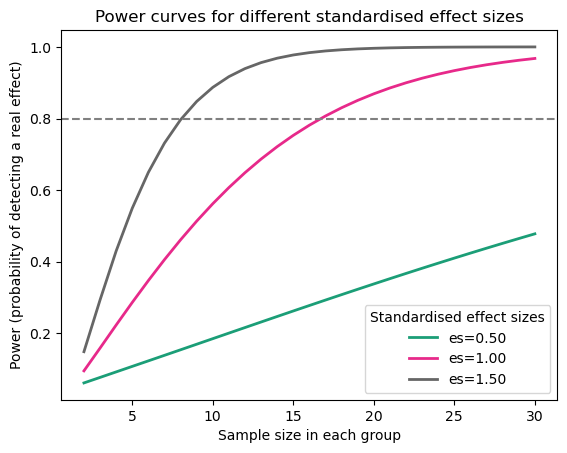

In [ ]:
# plot power curves for different standardised effect sizes

difference_in_means = 1, 2, 3    # different effect sizes to plot (one line for each)
std_dev = 2

sample_sizes = range(2, 31)    # plot sample sizes on x-axis from 2 to 30

fig = power_analysis.plot_power(
    nobs=np.array(sample_sizes),
    effect_size=np.array(difference_in_means) / std_dev
)

# add some useful annotations
ax = fig.gca()
ax.set_title('Power curves for different standardised effect sizes')
ax.set_ylabel('Power (probability of detecting a real effect)')
ax.set_xlabel('Sample size in each group')
ax.legend(title='Standardised effect sizes')
ax.axhline(0.8, linestyle='--', color='grey');  # add horizontal line at power = 0.8

## Practice exercise

Matt did his pilot study for his grant application about sex differences in Th2 memory responses in BALB/c mice infected with the murine nematode *Heligmosomoides polygyrus bakerei*. T central memory (Tcm), T effector memory (Tem) and T resident memory (Trm) cells committed to the Th2 lineage were counted in each of eight infected male mice and eight infected female mice.

The long-form data can be found in the file `Data/pilot.csv`.

Determine the minimum number of mice required for the main study to achieve statistical power of 80% to detect a difference between males and females for each of the T-cell types.

Hints: 
1. Make sure to plot the data to see what it looks like. 
2. Calculate mean cell counts and standard deviations for males and females for each cell type separately, i.e., six means and six std. devs. in total. 
3. Use the average of the six standard deviations in the power calculation.

Some python functions that you may find useful:

```python
# read in a file
df = pd.read_csv('filename.csv')

# a boxplot with the response on the y-axis, explanatory variable 1 on the x-axis, and explanatory variable 2 in different colours
sns.boxplot(data=df, x='explanatory var 1', hue='explanatory var 2', y='response')

# a stripplot with the response on the y-axis, explanatory variable 1 on the x-axis, and explanatory variable 2 in different colours
sns.stripplot(data=df, x='explanatory var 1', hue='explanatory var 2', y='response', dodge=True)

# calculate means of the response variable for each group
# replace .mean() with .std() for the standard deviations
means = df.groupby(['explanatory var 1', 'explanatory var 2'])['response'].mean()
```

